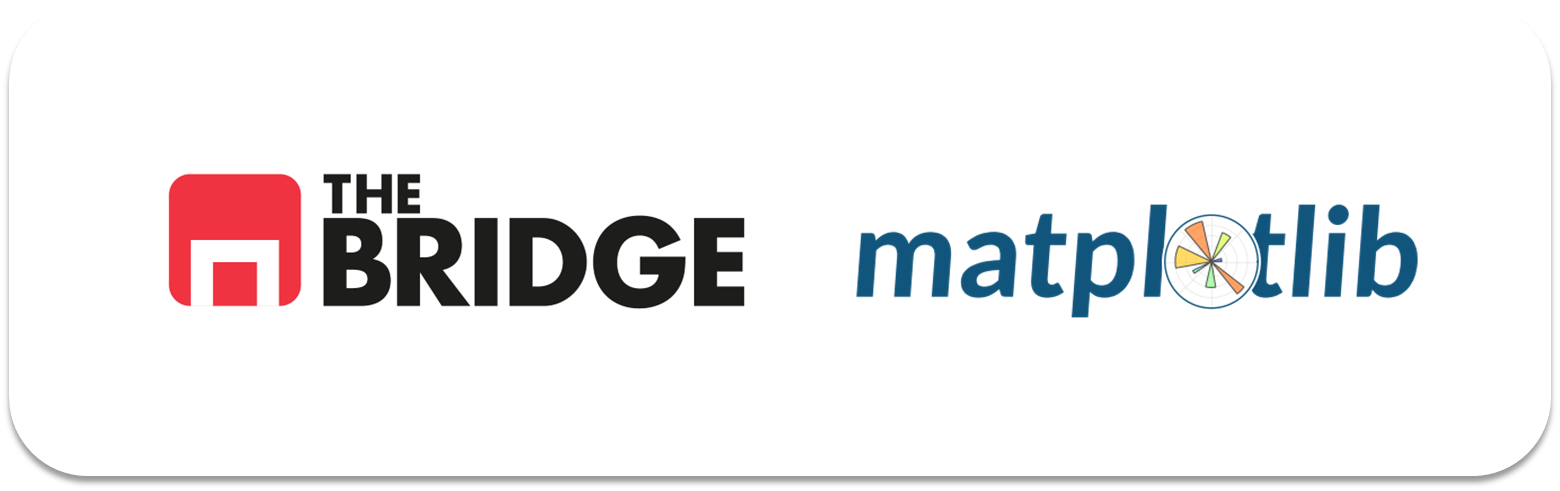

## PRACTICA OBLIGATORIA: VISUALIZACION BASICA

* La práctica obligatoria de esta unidad consiste en un único ejercicio de construcción de gráficas. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## #1

### #1.1

Carga el dataset de casas de California que está en la ruta "./data/california_cities.csv". Muestra parte de su contenido y su descripción. Deshazte de las filas con nulos.

In [38]:
cities = pd.read_csv("./data/california_cities.csv")
df_cali = pd.read_csv("./data/california_cities.csv")
cities.columns

Index(['Unnamed: 0', 'city', 'latd', 'longd', 'elevation_m', 'elevation_ft',
       'population_total', 'area_total_sq_mi', 'area_land_sq_mi',
       'area_water_sq_mi', 'area_total_km2', 'area_land_km2', 'area_water_km2',
       'area_water_percent'],
      dtype='object')

In [4]:
cities.dropna(inplace=True)

In [5]:
cities.isna().sum() / len(cities)*100

Unnamed: 0            0.0
city                  0.0
latd                  0.0
longd                 0.0
elevation_m           0.0
elevation_ft          0.0
population_total      0.0
area_total_sq_mi      0.0
area_land_sq_mi       0.0
area_water_sq_mi      0.0
area_total_km2        0.0
area_land_km2         0.0
area_water_km2        0.0
area_water_percent    0.0
dtype: float64

### #1.2

Recrea la siguiente figura, para ello construye en apartados separados cada gráfico y luego haz un apartado en el que se junten los cuatro. Las figuras son:
1. Las ciudades más pobladas, con los numeros de las poblaciones (tendrás que usar texto y recordar que para centrarlos se necesita poner el argumento `ha` a "center"). (Colores: azul, gris, aceituna, marrón, con trasparencia)
2. Histograma del área total ocupada por las ciudades. (50 bins, fuente = "Bradley Hand itc", tamaño 18, color azul acero)
3. El scatter de área de agua de un ciudad con su poblacion.
4. El boxplot de la altura de las ciudades.

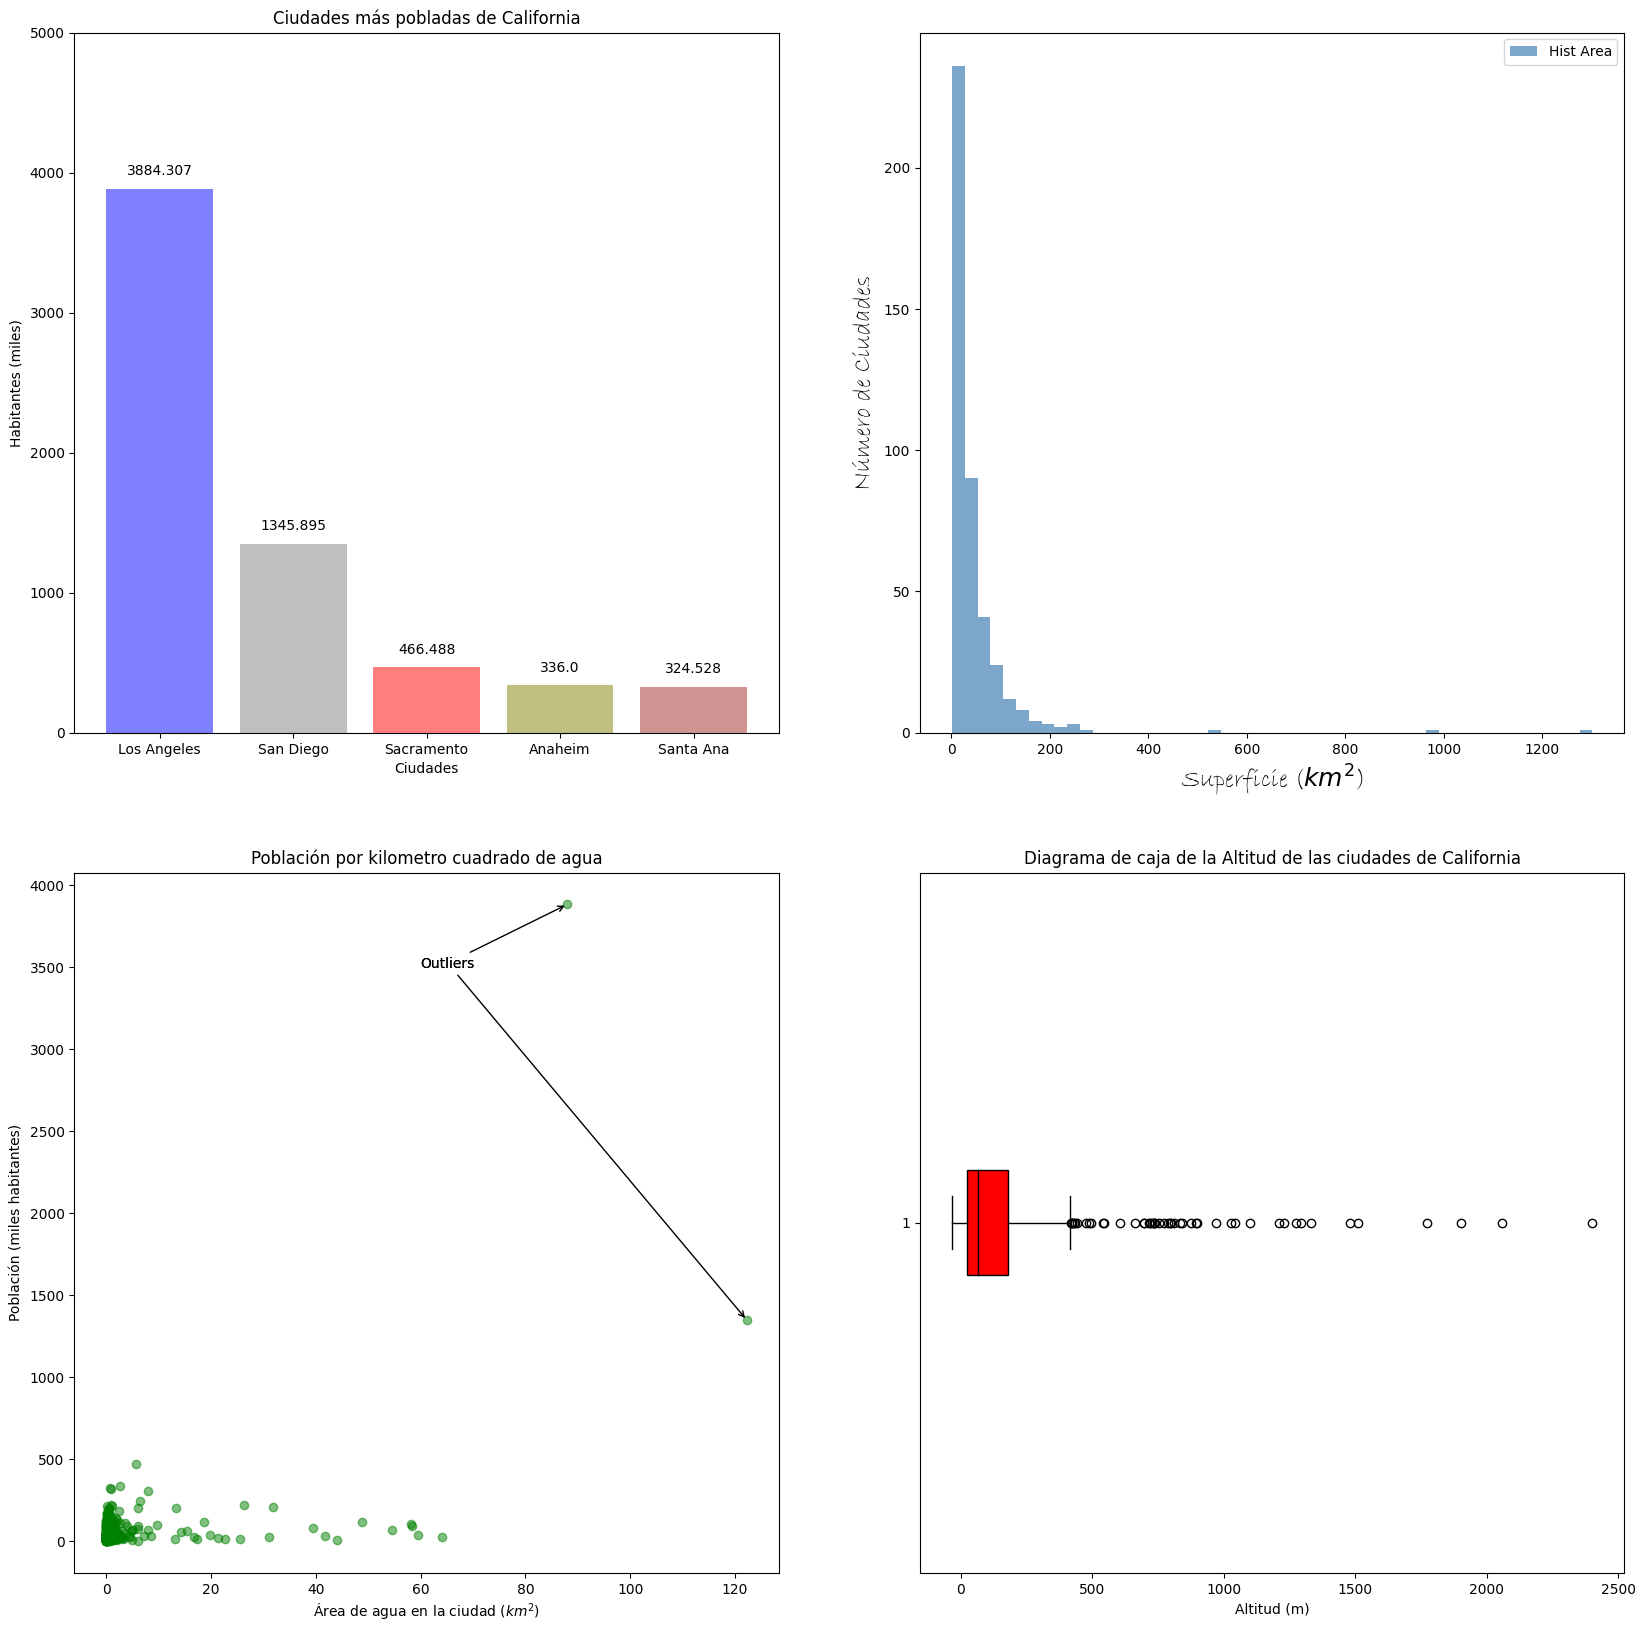

### #1.3

Graba la figura en un archivo y sube el archivo a tu repo personal también.

In [6]:
cities = cities.sort_values(by='population_total', ascending=False)
top_cities = cities.head(5)
top_cities


Unnamed: 0        city       latd       longd  elevation_m  elevation_ft   
239         239  LosAngeles  34.050000 -118.250000         71.0           2.0  \
367         367    SanDiego  32.715000 -117.162500          6.0           3.0   
359         359  Sacramento  38.555556 -121.468889          9.0          30.0   
9             9     Anaheim  33.836111 -117.889722         48.0         157.0   
386         386    SantaAna  33.740833 -117.881389         35.0         115.0   

     population_total  area_total_sq_mi  area_land_sq_mi  area_water_sq_mi   
239           3884307           503.000          469.000            34.000  \
367           1345895           372.400          325.190            47.210   
359            466488           100.105           97.915             2.190   
9              336000            50.811           49.835             0.976   
386            324528            27.518           27.270             0.248   

     area_total_km2  area_land_km2  area_water_km2  area_water_percent  
239        1302.000       1214.000          88.000                6.70  
367         964.510        842.230         122.270               12.68  
359         259.273        253.600           5.673                2.19  
9           131.600        129.073           2.527                1.92  
386          71.271         70.628           0.643                0.90

In [23]:

top_cities=cities.loc[cities.population_total.nlargest(5).index,["city","population_total"]]
top_cities


city  population_total
239  LosAngeles           3884307
367    SanDiego           1345895
359  Sacramento            466488
9       Anaheim            336000
386    SantaAna            324528

In [ ]:
ciudades=top_cities["city"].tolist()
colors = ['blue', 'gray', 'olive', 'brown', 'cyan'] 

['LosAngeles', 'SanDiego', 'Sacramento', 'Anaheim', 'SantaAna']

In [37]:
plt.figure(figsize=(10,5))
plt.bar(x=top_cities["city"],height=top_cities["population_total"]/1000, color=colors, alpha=0.5)

plt.ylim([0,5000])
plt.title("ciudades mas pobladas de California")
plt.xlabel('Ciudad', fontsize=12)
plt.ylabel('Población total', fontsize=12)
for indice, ciudad in enumerate(top_cities.index):
    poblacion = top_cities.loc[ciudad,"population_total"]/1000,
    plt.text(ciudades[indice], poblacion, f"{poblacion}", ha = "center")
plt.show()


TypeError: float() argument must be a string or a real number, not 'tuple'

<Figure size 1000x500 with 1 Axes>

C:\Users\joser\AppData\Local\Temp\ipykernel_20188\1208719147.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(top_cities['city'], rotation=45, ha='right')


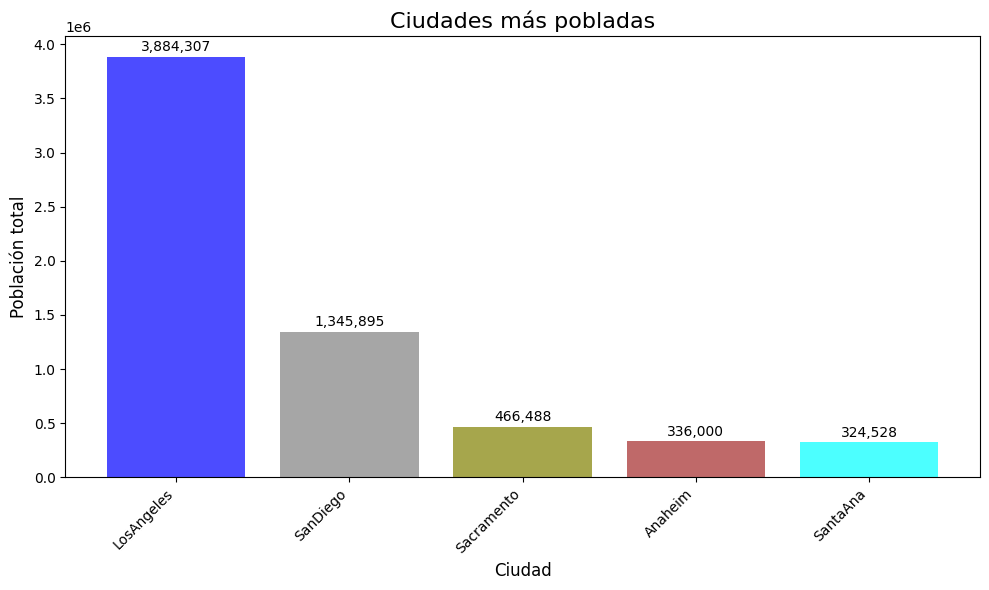

In [ ]:

cities.population_total.nlargest(10)

cities = cities.sort_values(by='population_total', ascending=False)
top_cities = cities.head(5)
top_cities


# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Colores personalizados
colors = ['blue', 'gray', 'olive', 'brown', 'cyan']  # Añadimos más colores si es necesario

# Crear el gráfico de barras
bars = ax.bar(top_cities['city'], top_cities['population_total'], color=colors, alpha=0.7)

# Agregar etiquetas de población centradas sobre las barras
for bar, population in zip(bars, top_cities['population_total']):
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # Posición centrada
        bar.get_height() + 50000,          # Un poco encima de la barra
        f'{population:,}',                 # Formato con comas
        ha='center', fontsize=10, color='black'
    )

# Configurar el título y las etiquetas de los ejes
ax.set_title('Ciudades más pobladas', fontsize=16)
ax.set_xlabel('Ciudad', fontsize=12)
ax.set_ylabel('Población total', fontsize=12)

# Rotar etiquetas del eje X para mayor legibilidad
ax.set_xticklabels(top_cities['city'], rotation=45, ha='right')

# Ajustar diseño
fig.tight_layout()

# Mostrar el gráfico
plt.show();


In [9]:

# Crear el histograma
plt.figure(figsize=(10, 6))  # Tamaño del gráfico
plt.boxplot(cities['area_total_km2'], bins=50, color='steelblue', edgecolor='black', alpha=0.7)

# Personalizar títulos y etiquetas con la fuente solicitada
plt.title('Distribución del Área Total de las Ciudades', fontsize=18, fontname='Bradley Hand ITC')
plt.xlabel('Superficie (km²)', fontsize=18, fontname='Bradley Hand ITC')
plt.ylabel('Frecuencia', fontsize=18, fontname='Bradley Hand ITC')

# Ajustar diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()


TypeError: boxplot() got an unexpected keyword argument 'bins'

<Figure size 1000x600 with 0 Axes>

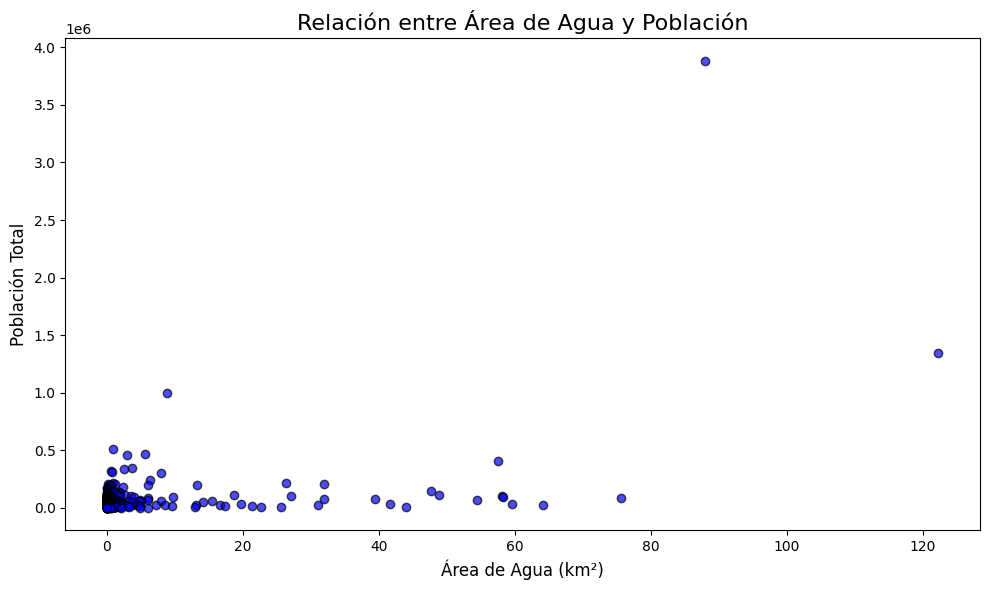

In [5]:

# Crear el scatter plot
plt.figure(figsize=(10, 6))  # Tamaño del gráfico
plt.scatter(cities['area_water_km2'], cities['population_total'], color='blue', alpha=0.7, edgecolor='black')

# Agregar etiquetas y título
plt.title('Relación entre Área de Agua y Población', fontsize=16)
plt.xlabel('Área de Agua (km²)', fontsize=12)
plt.ylabel('Población Total', fontsize=12)

# Anotaciones con los nombres de las ciudades
#for i, city in enumerate(cities['city']):
 #   plt.text(cities['area_water_km2'].iloc[i], cities['population_total'].iloc[i], city, fontsize=10, ha='right')

# Mostrar el gráfico
plt.tight_layout()
plt.show();


In [10]:
data=cities.elevation_m
data

239     71.0
367      6.0
359      9.0
9       48.0
386     35.0
       ...  
366     22.0
190     98.0
7      280.0
448     62.0
327    259.0
Name: elevation_m, Length: 427, dtype: float64

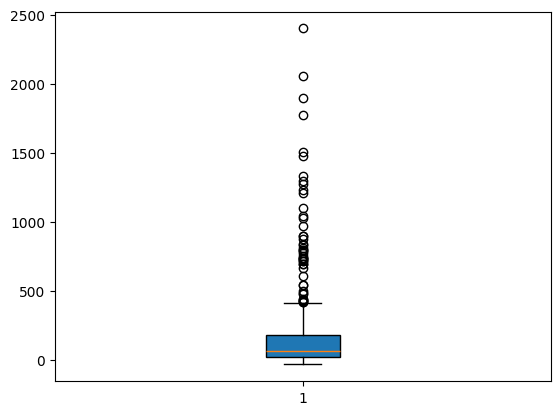

In [11]:
# Crear el boxplot
#plt.figure(figsize=(8, 6))  # Tamaño del gráfico
plt.boxplot(data, patch_artist=True,whis=1.5);
# Personalizar títulos y etiquetas
#plt.title('Distribución de la Altura de las Ciudades', fontsize=16)
#plt.ylabel('Altura (m)', fontsize=12)
#plt.xticks([1], ['Ciudades'])  # Solo hay un grupo, llamado "Ciudades"

# Mostrar el gráfico
#plt.tight_layout()
#plt.show()


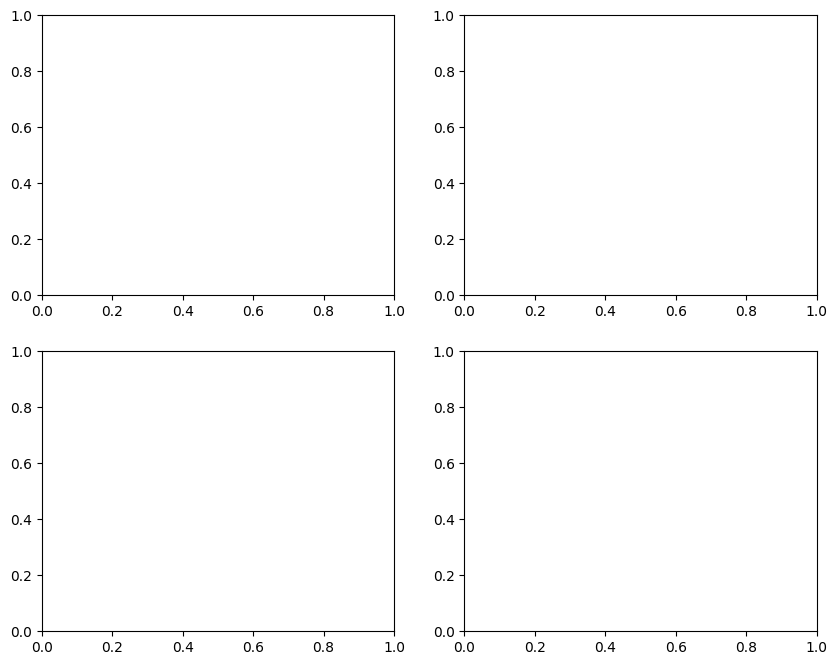

In [12]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))


TypeError: 'Text' object is not callable

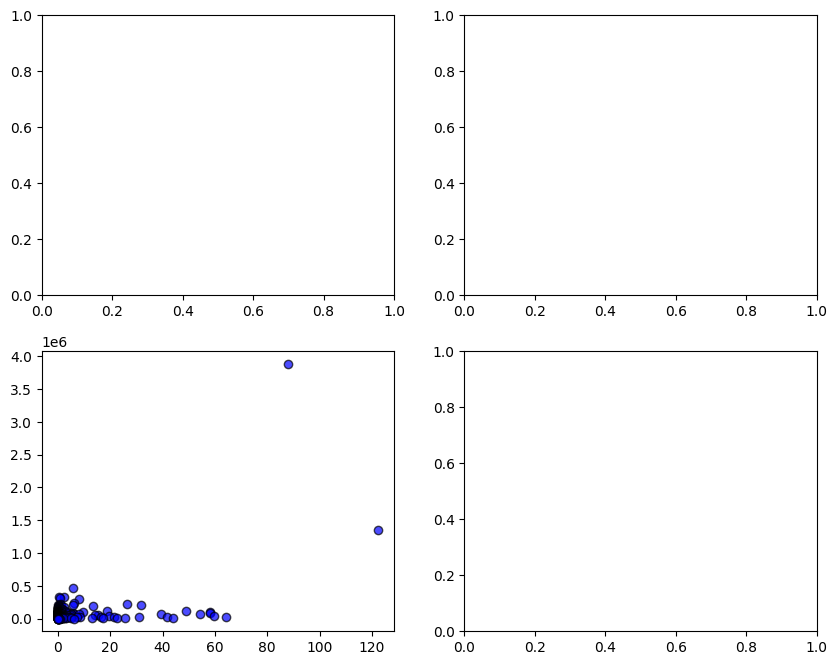

In [13]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))


#ax[0,1].figure(figsize=(10, 6))  # Tamaño del gráfico
axs[1,0].scatter(cities['area_water_km2'], cities['population_total'], color='blue', alpha=0.7, edgecolor='black')

# Agregar etiquetas y título
axs[1,0].title('Relación entre Área de Agua y Población', fontsize=16)
axs[1,0].xlabel('Área de Agua (km²)', fontsize=12)
axs[1,0].ylabel('Población Total', fontsize=12)

# Anotaciones con los nombres de las ciudades
#for i, city in enumerate(cities['city']):
 #   plt.text(cities['area_water_km2'].iloc[i], cities['population_total'].iloc[i], city, fontsize=10, ha='right')

# Mostrar el gráfico
plt.tight_layout()
plt.show();

TypeError: 'DataFrame' object is not callable

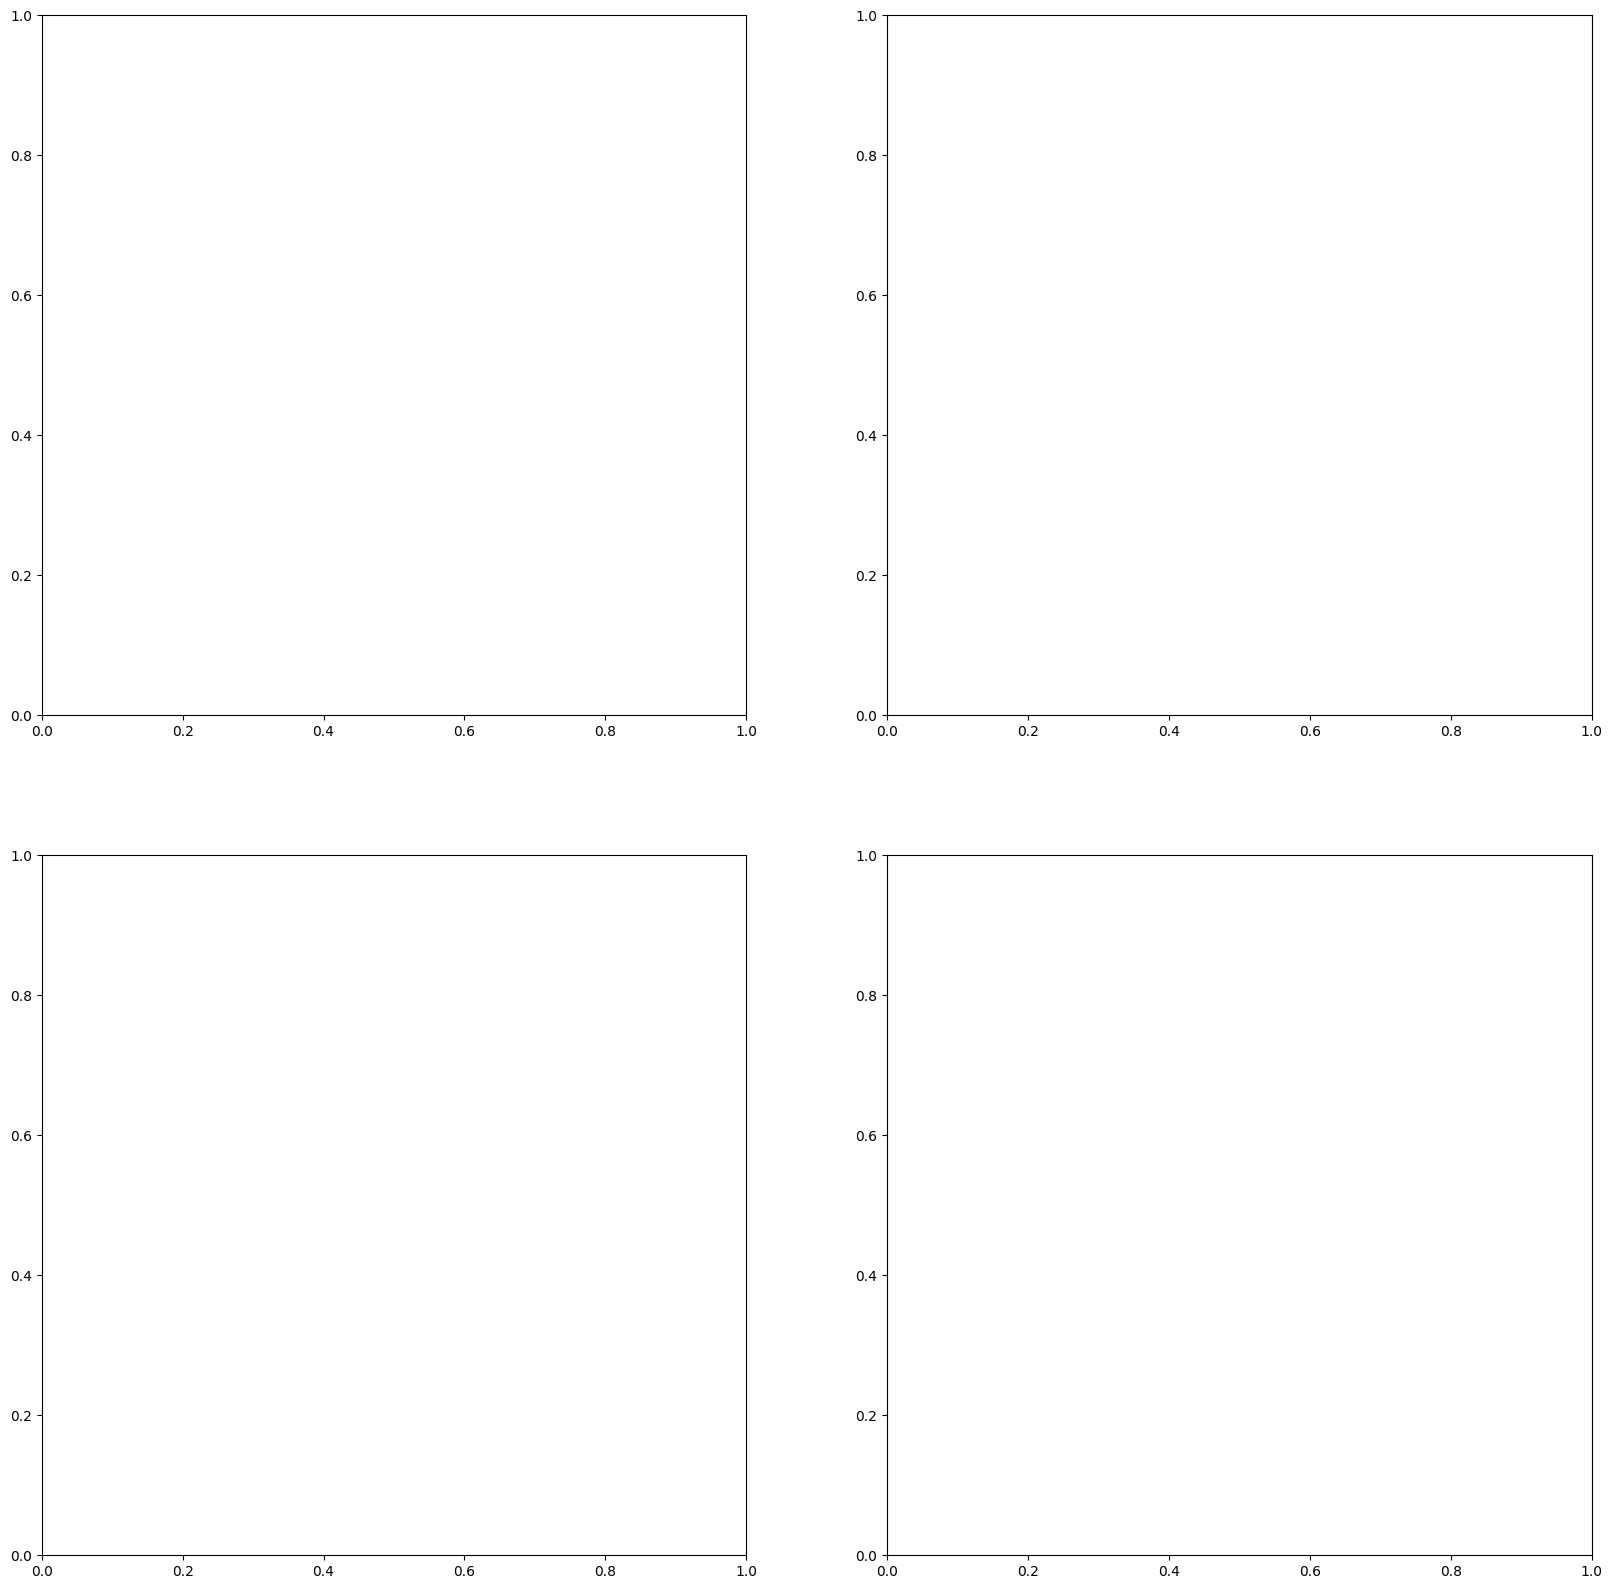

In [ ]:
# Todas juntas

fig,axs = plt.subplots(2,2, figsize = (20,20))
axs = axs.flatten()

# Primera figura
primera = axs[0]
ciudades_mas_pobladas = df_cali.loc[df_cali.population_total.nlargest(5).index, ["city","population_total"]]
ciudades = [separa_nombre(ciudad) for ciudad in ciudades_mas_pobladas["city"].to_list()]
colores = ["blue","gray","red","olive","brown"]

primera.bar(x= ciudades, height= ciudades_mas_pobladas["population_total"]/1000, color = colores, alpha = 0.5)
primera.set_ylim([0,5000])
primera.set_ylabel("Habitantes (miles)")
primera.set_xlabel("Ciudades")

ciudades_mas_pobladas.set_index("city", inplace = True)
for indice, ciudad in enumerate(ciudades_mas_pobladas.index):
    poblacion = ciudades_mas_pobladas.loc[ciudad,"population_total"]/1000
    primera.text(ciudades[indice], poblacion + 100, f"{poblacion}", ha = "center")
primera.set_title("Ciudades más pobladas de California")

# Segunda gráfica
segunda = axs[1]
segunda.hist(df_cali["area_total_km2"], color = "steelblue", alpha = 0.7, bins = 50, label = "Hist Area")
segunda.set_xlabel("Superficie ($km^2$)", fontdict = dict(family = "Bradley Hand itc", size = 18))
segunda.set_ylabel("Número de Ciudades", fontdict= dict(family = "Bradley Hand itc", size = 18))
segunda.legend()


# Tercera gráfica
tercera = axs[2]
tercera.scatter(df_cali["area_water_km2"], df_cali["population_total"]/1000, alpha = 0.5, color = "green")
tercera.set_xlabel("Área de agua en la ciudad ($km^2$)")
tercera.set_ylabel("Población (miles habitantes)")
tercera.set_title("Población por kilometro cuadrado de agua")
outlier_1_y = ciudades_mas_pobladas.population_total.max()
outlier_2_y = ciudades_mas_pobladas.population_total.nlargest(2).iloc[1]
outlier_1_x = df_cali.loc[df_cali.population_total == outlier_1_y,"area_water_km2"].values[0]
outlier_2_x = df_cali.loc[df_cali.population_total == outlier_2_y,"area_water_km2"].values[0]
tercera.annotate(xy= (outlier_1_x,outlier_1_y/1000), xytext= (60,3500), text = "Outliers",
              arrowprops= dict(arrowstyle = "->"))
tercera.annotate(xy= (outlier_2_x,outlier_2_y/1000), xytext= (60,3500), text = "Outliers",
              arrowprops= dict(arrowstyle = "->"))


#### Cuarta gráfica
cuarta = axs[3]
cuarta.boxplot(df_cali["elevation_m"].dropna(), vert = False, boxprops = dict(facecolor = "red"),
               medianprops = dict(color= "black"), patch_artist= True)
cuarta.set_xlabel("Altitud (m)")
cuarta.set_title("Diagrama de caja de la Altitud de las ciudades de California");